# Global Power Plant Database

### Global Power Plant Database

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

The database includes the following indicators:

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
au=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv")
ind=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv")
usa=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv")


In [3]:
# combining 3 datasets using concat mathod of pandas
df=pd.concat([au,ind,usa])

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [5]:
df.head(20)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AUS,Australia,Angaston,AUS0000232,50.00,-34.5034,139.0246,Oil,NaN,NaN,...,2019.0,NaN,NaN,1.653056,5.300833,7.649722,2.222222,NaN,Australia Clean Energy Regulator,NaN
6,AUS,Australia,Anglesea,AUS0000114,165.00,-38.3861,144.1828,Coal,NaN,NaN,...,2019.0,1095.676944,1239.962778,1260.261111,167.880000,NaN,NaN,NaN,Australia Clean Energy Regulator,NaN
7,AUS,Australia,Angurugu,AUS0000615,3.60,-13.8584,136.4209,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AUS,Australia,Appin (Mine),AUS0000264,55.60,-34.2082,150.7722,Gas,NaN,NaN,...,2019.0,204.804444,238.294444,163.583611,158.933056,64.534722,99.470000,NaN,Australia Clean Energy Regulator,NaN
9,AUS,Australia,Ararat Wind Farm,AUS0000611,240.00,-37.2385,143.0794,Wind,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
11869,USA,United States of America,Zero Waste Energy Development Co LLC,USA0060220,1.6,37.4325,-121.9528,Biomass,NaN,NaN,...,2019.0,NaN,NaN,5.814000,5.989000,6.95700,4.446000,3.884,U.S. Energy Information Administration,NaN
11870,USA,United States of America,Zimmerman Energy,USA0059425,6.0,41.2378,-86.2461,Waste,NaN,NaN,...,2019.0,NaN,3.54500,49.212000,46.399000,45.89800,45.373000,45.764,U.S. Energy Information Administration,NaN
11871,USA,United States of America,Zion Energy Center,USA0055392,596.7,42.4776,-87.8950,Gas,Oil,NaN,...,2019.0,0.000,63.65600,132.434005,435.493999,0.00000,522.427997,597.390002,U.S. Energy Information Administration,NaN
11872,USA,United States of America,Zion Landfill Gas to Energy Facility,USA0056871,7.0,42.4803,-87.8861,Waste,NaN,NaN,...,2019.0,43.592,49.13400,46.699000,42.480000,38.66900,30.495000,22.647,U.S. Energy Information Administration,NaN
11873,USA,United States of America,Zorn,USA0001368,18.0,38.2803,-85.7023,Gas,NaN,NaN,...,2019.0,0.203,0.07800,1.058000,0.062000,0.01500,-0.073000,-0.045,U.S. Energy Information Administration,NaN
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671,2.46015,2.489000,1.670000,1.23349,2.630000,1.211,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000,0.00000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN
11878,USA,United States of America,eBay - South Jordan,USA0059281,9.8,40.5606,-112.0478,Gas,NaN,NaN,...,2019.0,12.968,51.27600,71.505000,76.392000,76.63100,75.228000,72.06506,U.S. Energy Information Administration,NaN


# Exploratory Data Analysis

In [7]:
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 13298
Number of Columns: 27


In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url        

In [10]:
# checking null values
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

there are a lot of null values present in the dataset.

<Axes: >

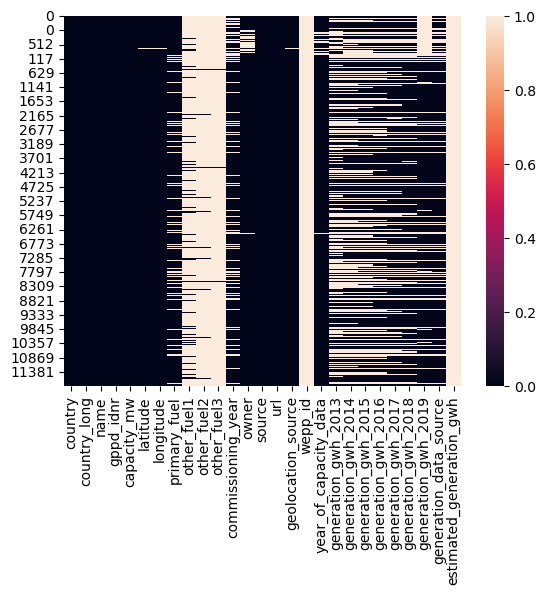

In [11]:
# visualizing using heatmap
sns.heatmap(df.isnull())

# Data Preprocessing

In [12]:
#Finding percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                          Missing Values  % Missing data
estimated_generation_gwh           13298      100.000000
wepp_id                            13298      100.000000
other_fuel3                        13206       99.308167
other_fuel2                        13028       97.969619
other_fuel1                        11670       87.757558
generation_gwh_2013                 6128       46.082118
generation_gwh_2014                 5764       43.344864
generation_gwh_2015                 5305       39.893217
generation_gwh_2016                 4597       34.569108
generation_gwh_2017                 4006       30.124831
generation_gwh_2019                 3520       26.470146
generation_gwh_2018                 3440       25.868552
commissioning_year                  2644       19.882689
generation_data_source              2463       18.521582
primary_fuel                        2004       15.069935
owner                                593        4.459317
year_of_capacity_data          

estimated_generation_gwh,wepp_id,other_fuel3,other_fuel2,other_fuel1 need to be dropped as they have more percentage of missing values.so we can drop these columns.

# Removing irrelevant columns

In [13]:
df.drop(columns=['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel2','other_fuel1','owner'],axis=1,inplace=True)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,2011.00000,Australian Renewable Energy Mapping Infrastruc...,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,Australian Renewable Energy Mapping Infrastruc...,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,Australian Renewable Energy Mapping Infrastruc...,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,2004.00000,Australian Renewable Energy Mapping Infrastruc...,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,2015.00000,Australian Renewable Energy Mapping Infrastruc...,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,2012.00000,U.S. Energy Information Administration,...,U.S. Energy Information Administration,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,2018.00000,U.S. Energy Information Administration,...,U.S. Energy Information Administration,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,U.S. Energy Information Administration,...,U.S. Energy Information Administration,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,U.S. Energy Information Administration,...,U.S. Energy Information Administration,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration


In [14]:
df.drop(columns=['country', 'country_long','url'],axis=1,inplace=True)

In [15]:
df.drop(columns=['generation_data_source','year_of_capacity_data','geolocation_source'],axis=1,inplace=True)

In [16]:
df['name'].value_counts()

name
Richland                      3
Central Utility Plant         2
Gladstone                     2
Franklin Solar                2
Hunter                        2
                             ..
E F Barrett                   1
E F Oxnard Energy Facility    1
E J West                      1
E Nash PV1                    1
eBay - South Jordan           1
Name: count, Length: 13266, dtype: int64

In [17]:
df.drop(columns=['name','gppd_idnr'],axis=1,inplace=True)

In [18]:
df.shape

(13298, 13)

# Filling null values

In [19]:
cols = ['generation_gwh_2013','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','capacity_mw']

# Replace NaN with zero in specific column
df[cols] = df[cols].fillna(0)

In [20]:
df['latitude'].fillna(value=df['latitude'].mean(), inplace= True)
df['longitude'].fillna(value=df['longitude'].mean(), inplace= True) 

In [21]:
df['primary_fuel']=df['primary_fuel'].fillna('other')

In [22]:
df.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year     2644
source                    0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
dtype: int64

In [23]:
df['commissioning_year']=df['commissioning_year'].fillna(0)

In [24]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [25]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.11,-34.9387,138.5377,Solar,2011.0,Australian Renewable Energy Mapping Infrastruc...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,1.00,-34.9453,138.5882,Solar,0.0,Australian Renewable Energy Mapping Infrastruc...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,21.60,-35.0641,117.7977,Wind,0.0,Australian Renewable Energy Mapping Infrastruc...,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,0
3,0.24,-23.7966,133.8971,Solar,2004.0,Australian Renewable Energy Mapping Infrastruc...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4.00,-34.5509,138.7659,Oil,2015.0,Australian Renewable Energy Mapping Infrastruc...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


<Axes: >

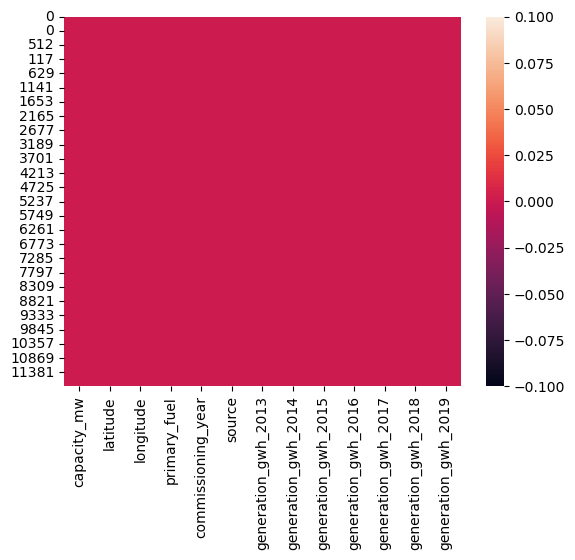

In [26]:
# visualizing using heatmap
sns.heatmap(df.isnull())

Now all the null values are removed from the dataset.

# Data Visualization

### Univariate analysis

In [27]:
df['primary_fuel'].value_counts()

primary_fuel
Solar           3480
Gas             2031
other           2004
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: count, dtype: int64

Text(0.5, 1.0, 'Fuel')

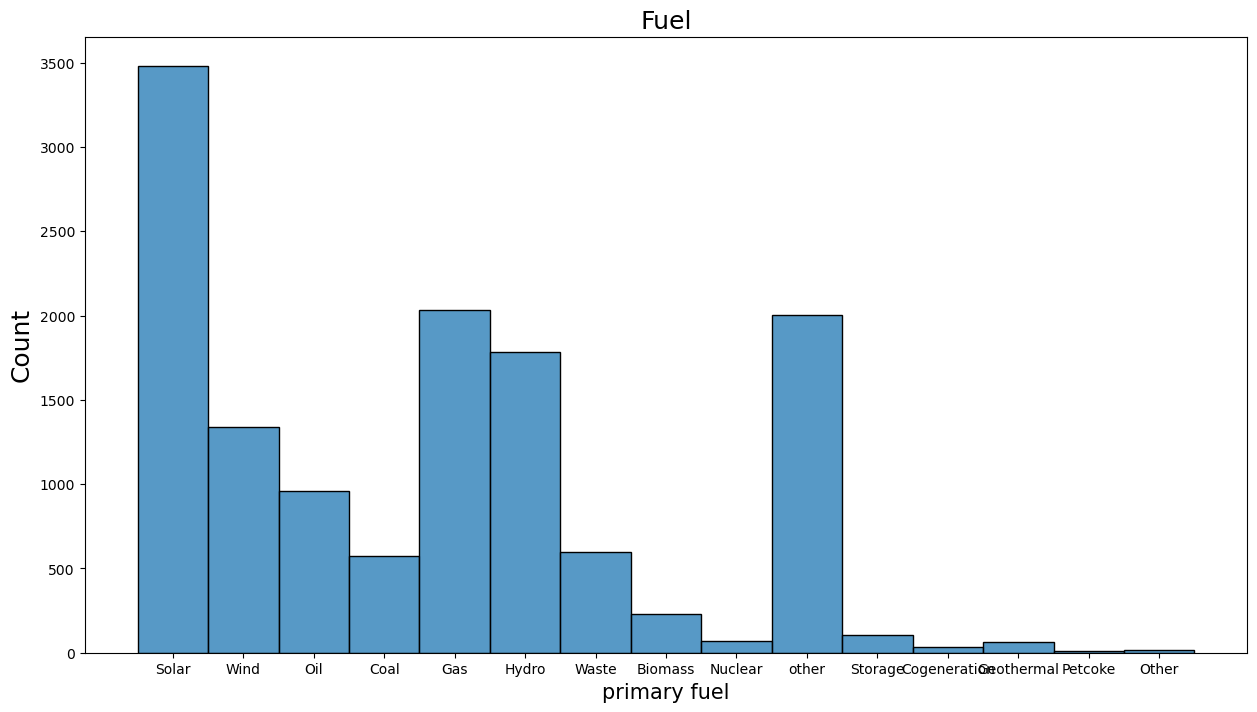

In [28]:
plt.figure(figsize=(15,8))
sns.histplot(df['primary_fuel'])
plt.xlabel('primary fuel', fontsize=15 )
plt.ylabel('Count', fontsize=18 )
plt.title('Fuel', fontsize=18)

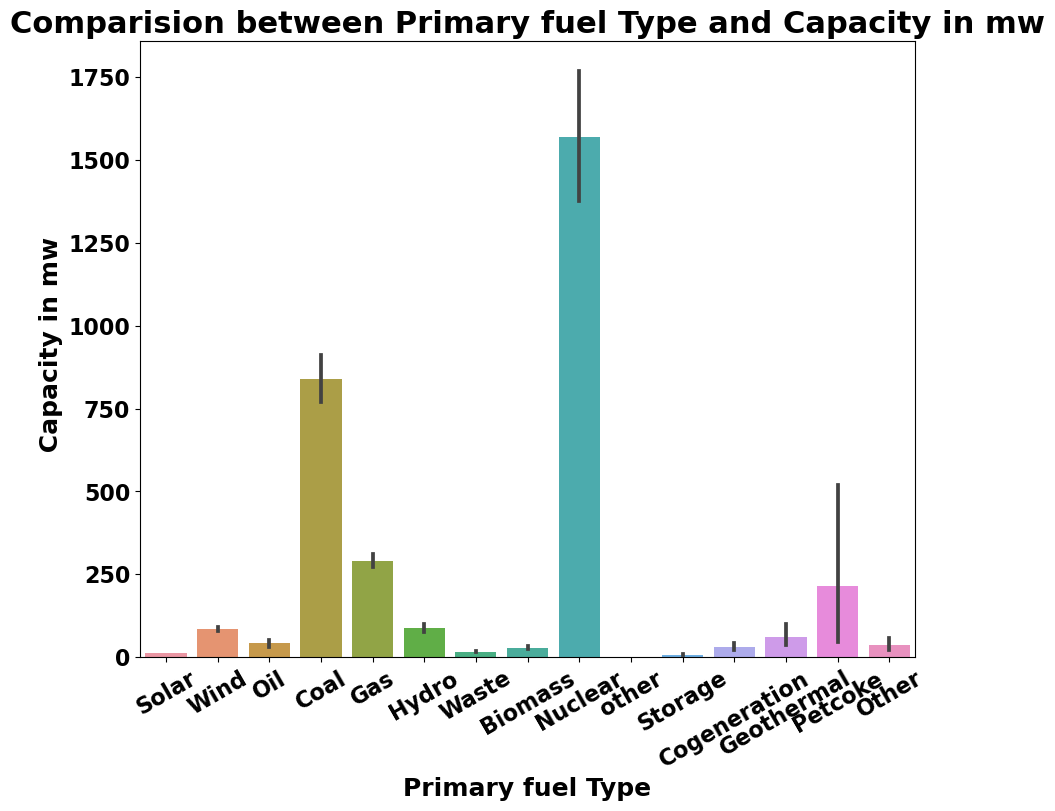

In [29]:
#Lets check the relation  primary_fuel Vs  capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel(' Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

In [30]:
# energy generated by Fuel type.
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,6715.960
Coal,480531.320
Cogeneration,1042.000
Gas,591625.326
Geothermal,3889.200
Hydro,156623.420
Nuclear,113013.100
Oil,40081.580
Other,572.400


In [31]:
# Total energy used in India.
print('Total Power Generation Capacity of all Power Plants :',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants : 1564983.0219999999 MW


### Label encoder for target column

In [32]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df['primary_fuel']=encode.fit_transform(df['primary_fuel'])

In [33]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.11,-34.9387,138.5377,10,2011.0,Australian Renewable Energy Mapping Infrastruc...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,1.00,-34.9453,138.5882,10,0.0,Australian Renewable Energy Mapping Infrastruc...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,21.60,-35.0641,117.7977,13,0.0,Australian Renewable Energy Mapping Infrastruc...,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,0
3,0.24,-23.7966,133.8971,10,2004.0,Australian Renewable Energy Mapping Infrastruc...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4.00,-34.5509,138.7659,7,2015.0,Australian Renewable Energy Mapping Infrastruc...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


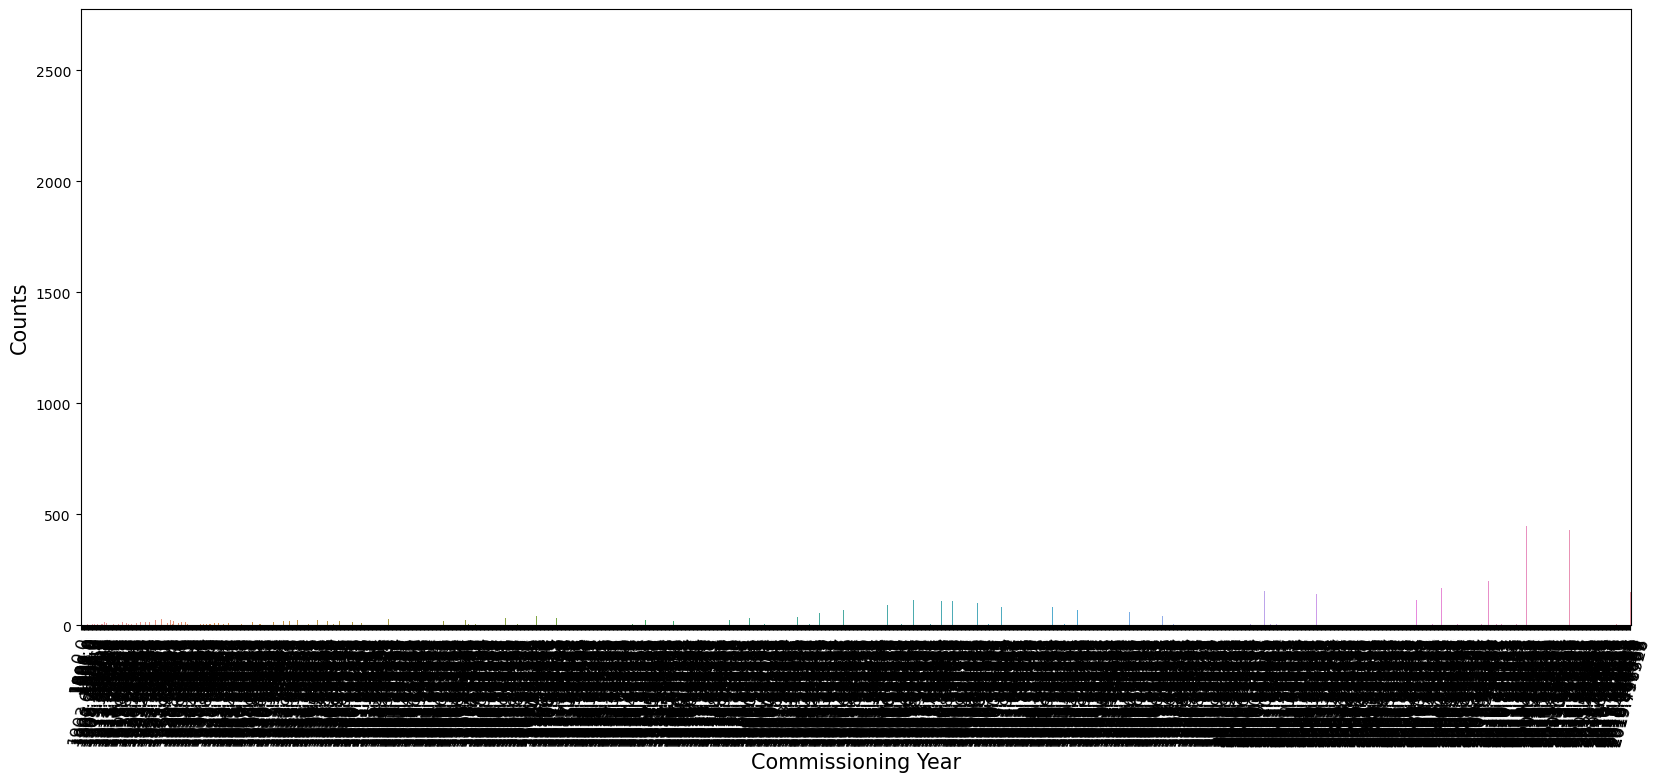

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='commissioning_year')
plt.xlabel('Commissioning Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(rotation=75, fontsize=12)
plt.show()

In [35]:
#Source is not more  useful.
df.drop(columns=['source'],axis=1,inplace=True)

### Bivariate Analysis

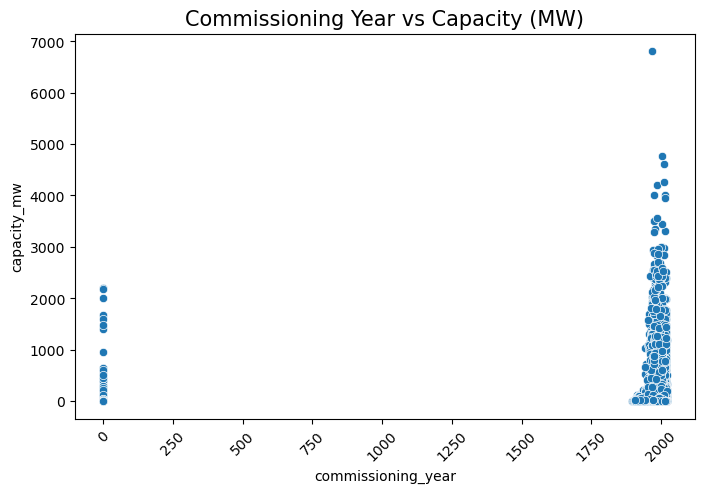

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='commissioning_year', y='capacity_mw')
plt.title('Commissioning Year vs Capacity (MW)', fontsize=15)
plt.xticks(rotation=45)  
plt.show()

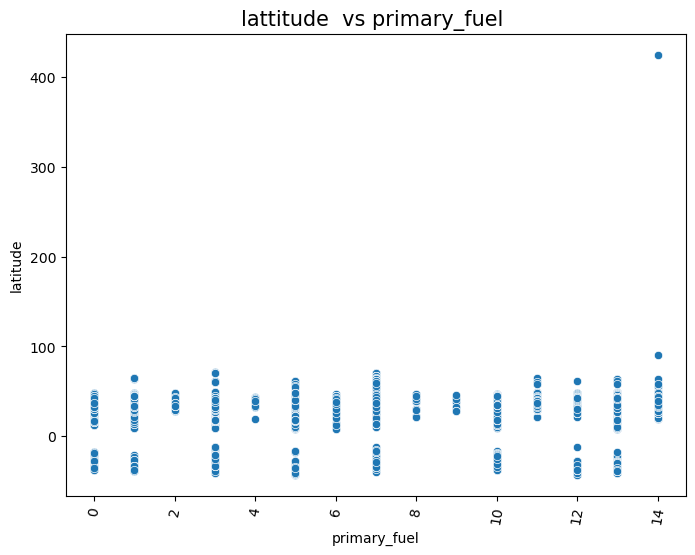

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, y='latitude',x='primary_fuel')
locs, labels = plt.xticks()
plt.title('lattitude  vs primary_fuel ', fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

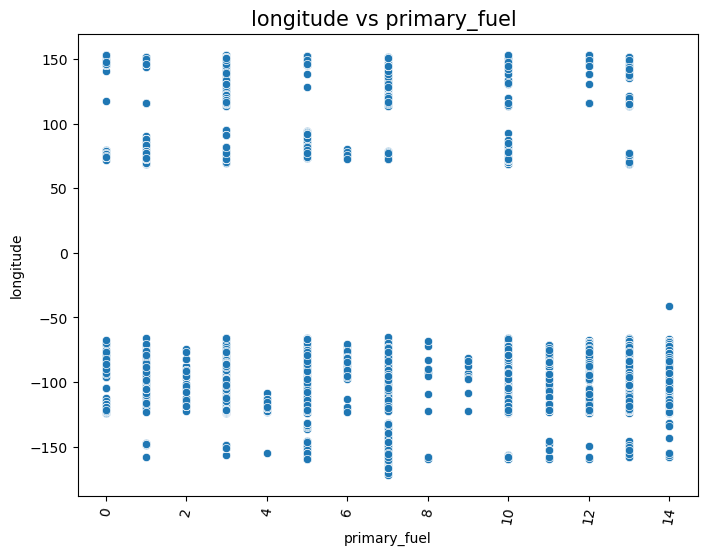

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, y='longitude',x='primary_fuel')
locs, labels = plt.xticks()
plt.title('longitude vs primary_fuel ', fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

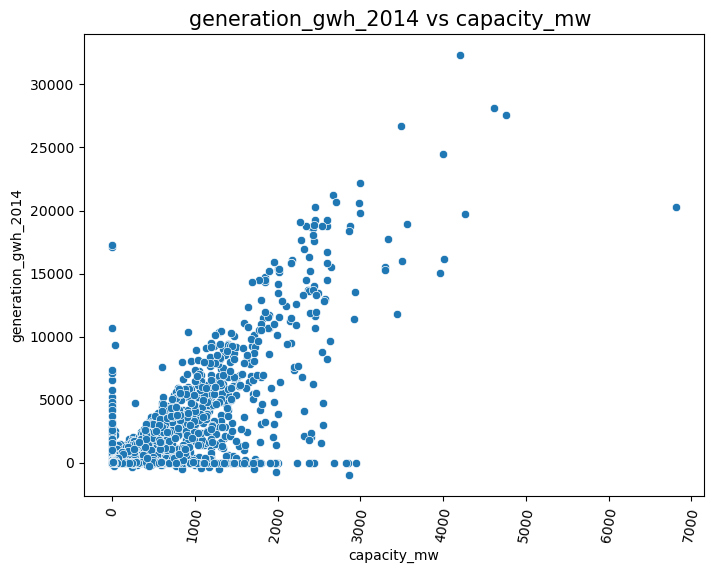

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, y='generation_gwh_2014',x='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

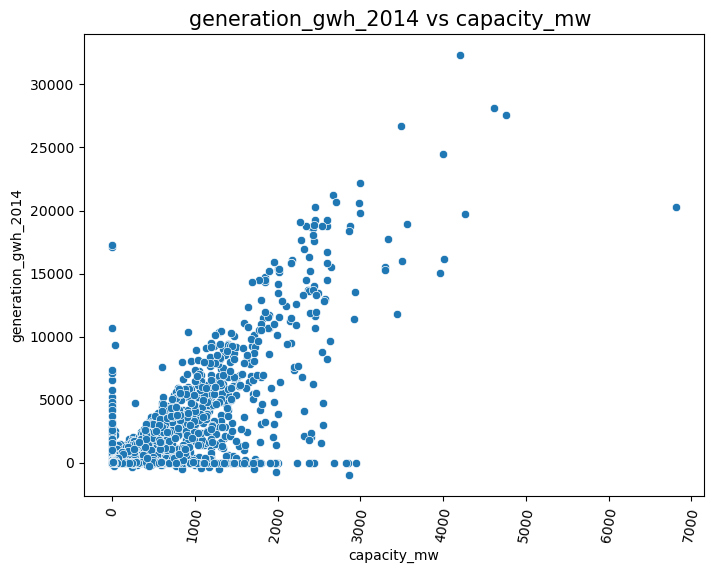

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, y='generation_gwh_2014',x='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

### Multivariate analysis

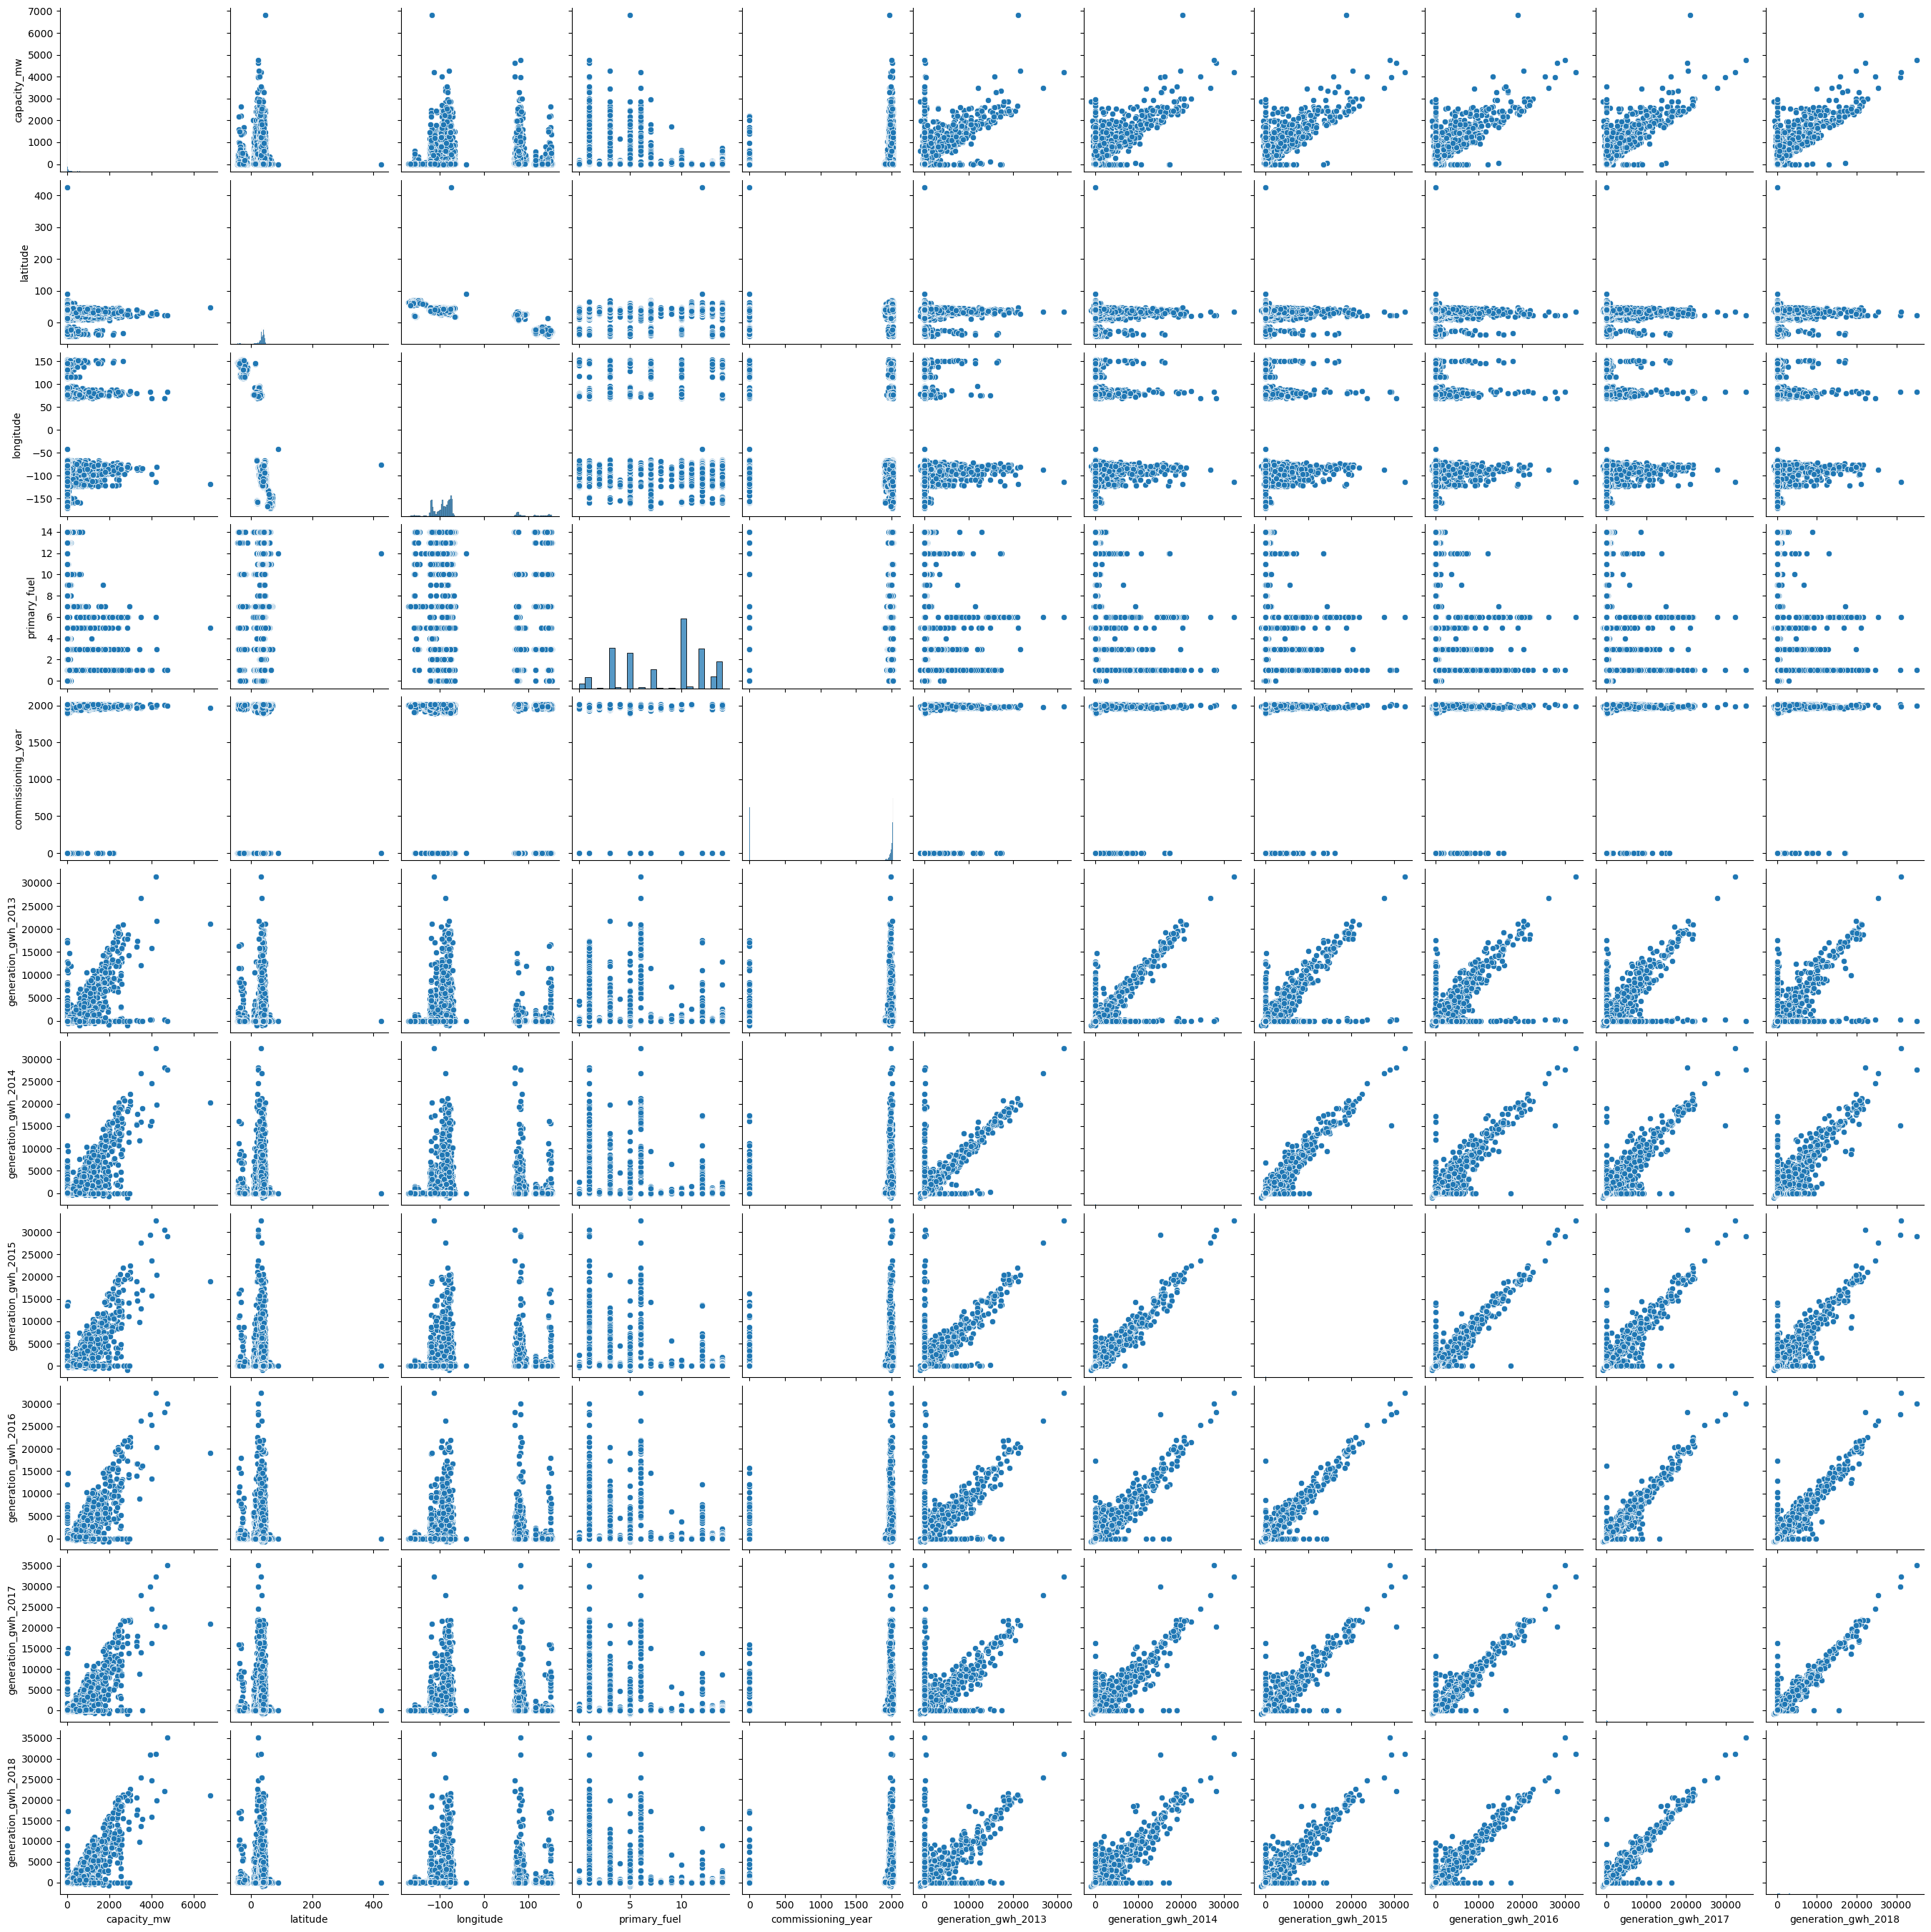

In [48]:
sns.pairplot(df)
plt.show()

# Statistical Analysis

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,13298.0,117.685593,347.099709,0.0000,1.50000,5.500000,52.650000,6809.0000
latitude,13298.0,35.053213,15.398830,-42.8883,33.91425,38.330650,42.166025,425.2461
longitude,13298.0,-73.794217,62.684169,-171.7124,-104.58340,-87.104400,-75.291600,153.4341
primary_fuel,13298.0,8.411340,4.256073,0.0000,5.00000,10.000000,13.000000,14.0000
commissioning_year,13298.0,1600.892011,797.830183,0.0000,1954.00000,2000.295163,2014.000000,2020.0000
generation_gwh_2013,13298.0,303.764303,1517.160081,-947.6000,0.00000,0.000000,27.758750,31431.0800
generation_gwh_2014,13298.0,360.179210,1680.540822,-989.6190,0.00000,0.004000,34.949500,32320.9170
generation_gwh_2015,13298.0,370.739766,1692.570573,-864.4280,0.00000,0.186500,40.148450,32525.5950
generation_gwh_2016,13298.0,367.580614,1679.916178,-768.6200,0.00000,1.788000,45.893500,32377.4770
generation_gwh_2017,13298.0,372.066048,1690.724691,-934.9440,0.00000,2.865000,51.903250,35116.0000


# Correlation between data

In [42]:
df.drop(columns=['generation_gwh_2019'],axis=1,inplace=True)

<Axes: >

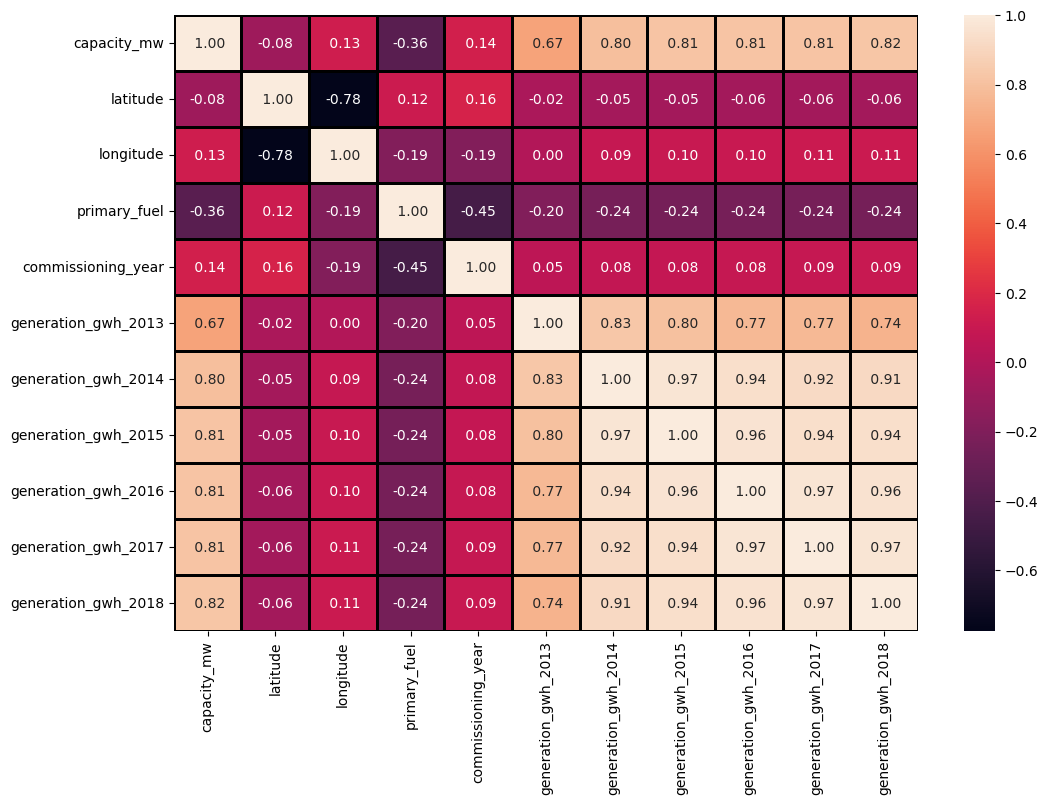

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f' )

# Removal of outlier

In [44]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers = ['capacity_mw', 'longitude', 
        'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores (e.g., 3)
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

In [45]:
#Shape after removing outliers
print('Shape of dataset after removing outliers :', df.shape)

Shape of dataset after removing outliers : (13298, 11)


# Checking Skewness of Dataset

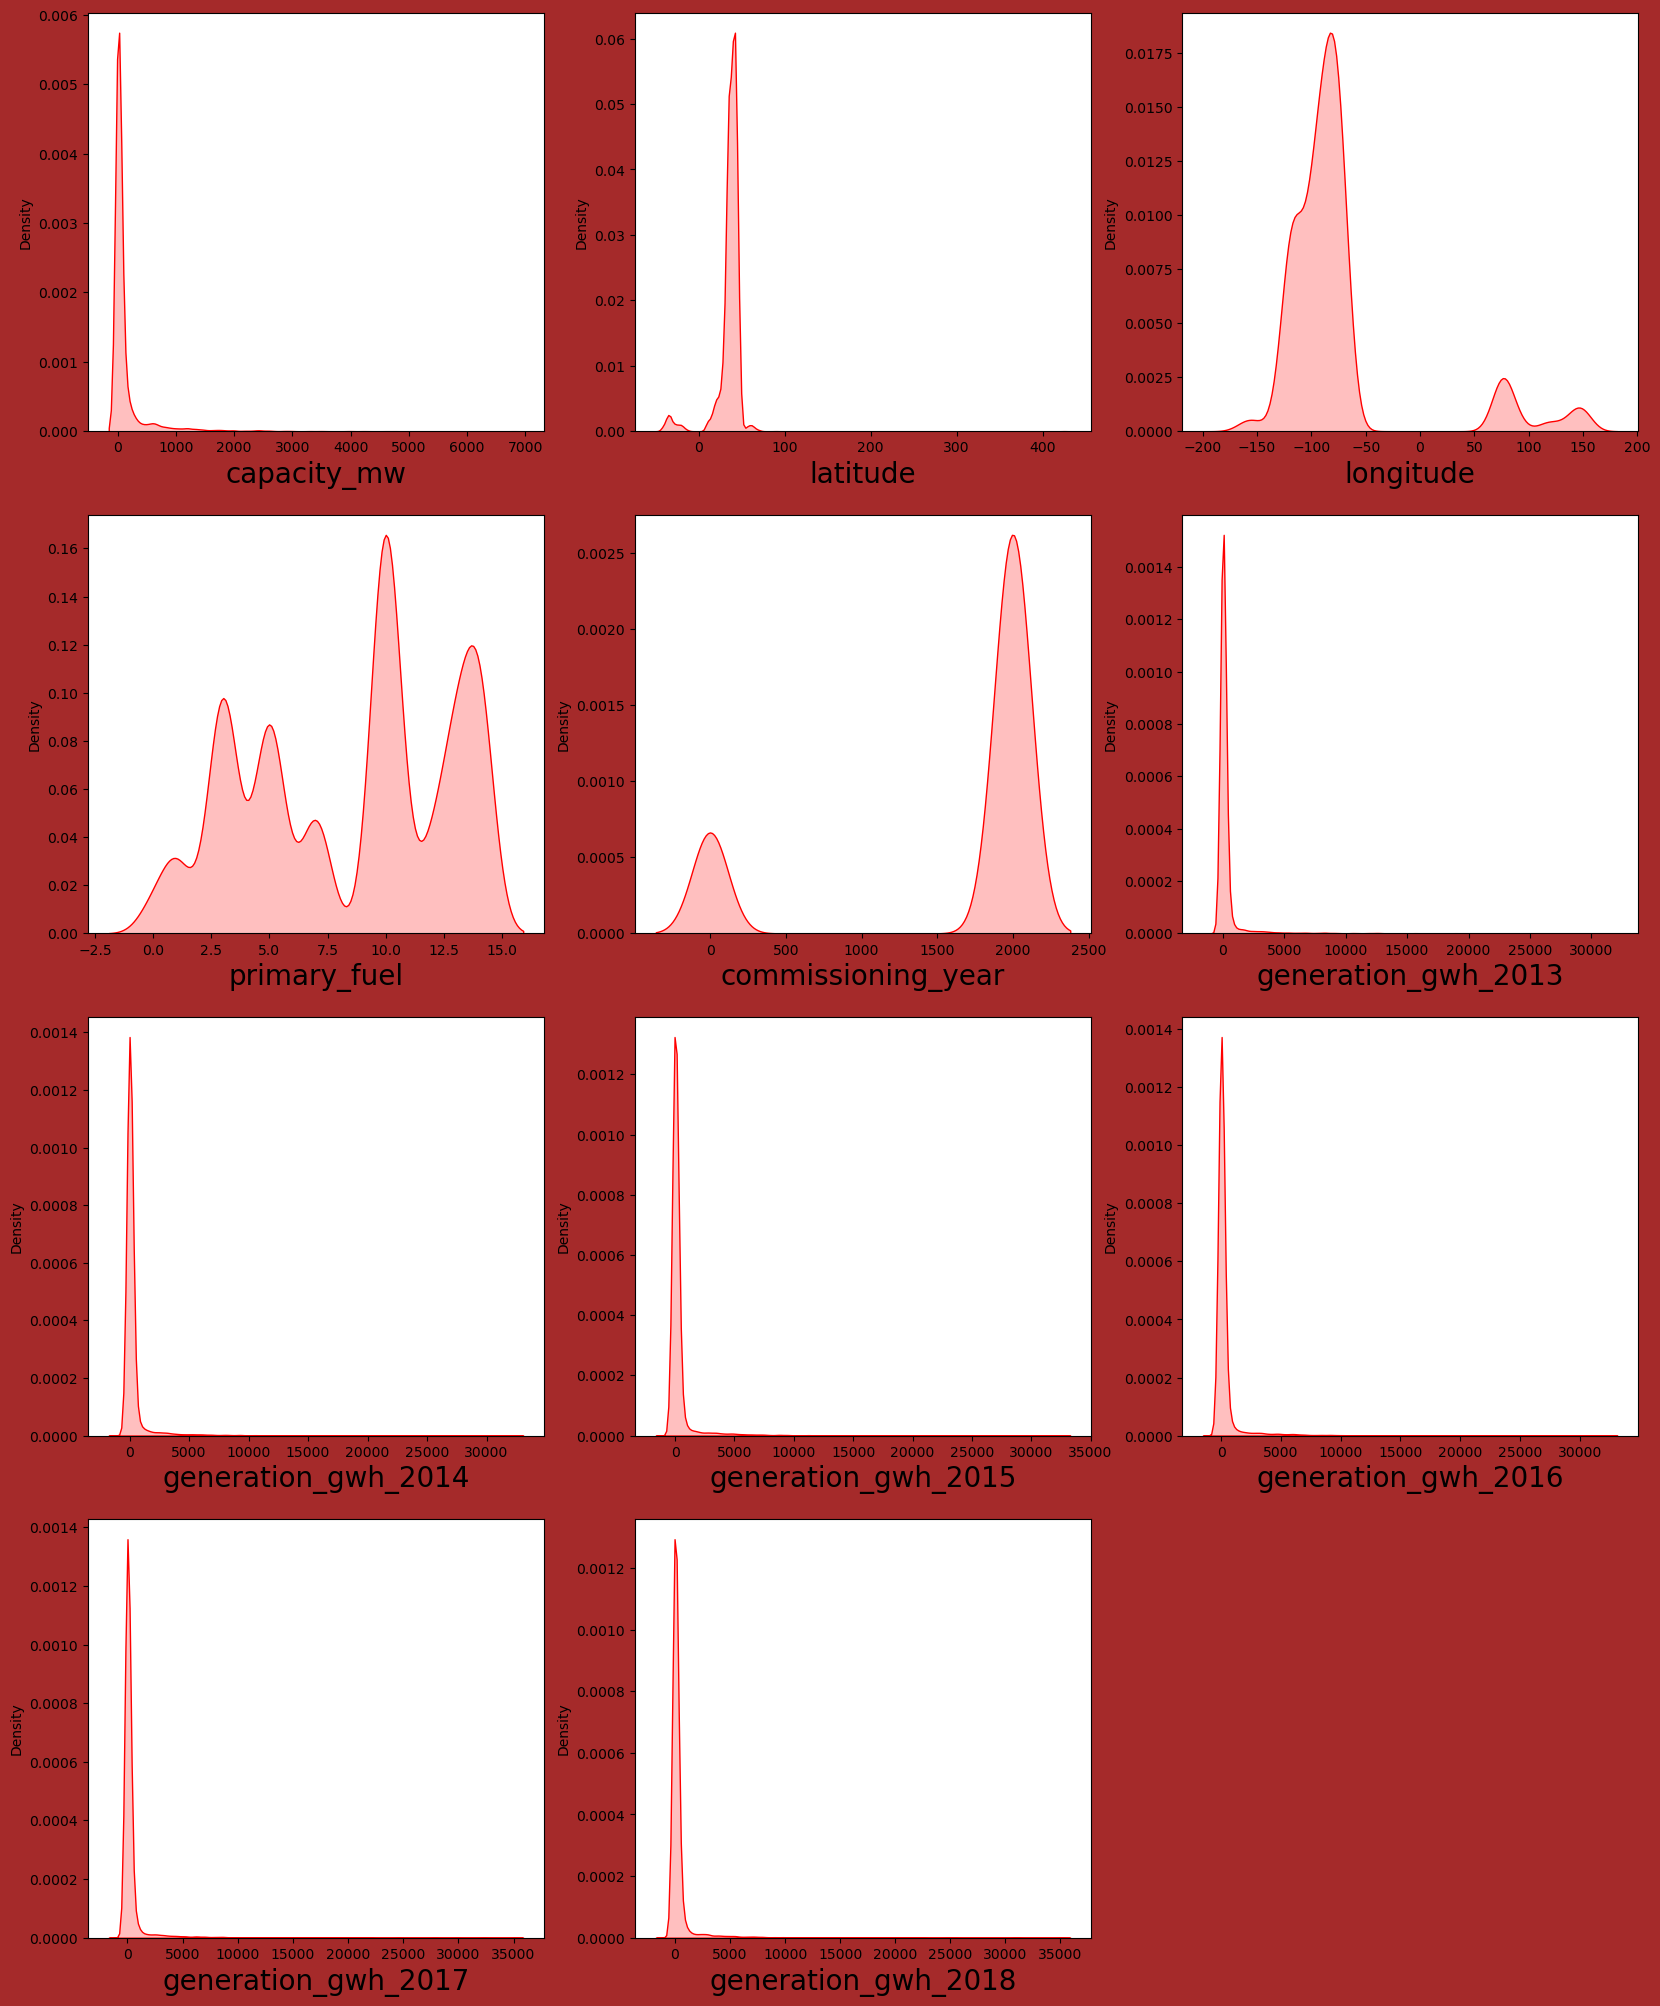

In [46]:
plt.figure(figsize=(20,25), facecolor='brown')
plotnumber=1
for column in df:
    if plotnumber <=11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [47]:
df.skew()

capacity_mw            5.474696
latitude              -1.864012
longitude              2.331246
primary_fuel          -0.251777
commissioning_year    -1.506674
generation_gwh_2013    8.531881
generation_gwh_2014    8.076996
generation_gwh_2015    8.219212
generation_gwh_2016    8.280632
generation_gwh_2017    8.359591
generation_gwh_2018    8.293077
dtype: float64

# Removing skewness

In [48]:
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [49]:
df.skew()

capacity_mw             5.474696
latitude               -1.864012
longitude               0.916164
primary_fuel           -0.251777
commissioning_year     -1.506674
generation_gwh_2013     8.531881
generation_gwh_2014   -12.472126
generation_gwh_2015   -11.364012
generation_gwh_2016    -8.915616
generation_gwh_2017    -9.854802
generation_gwh_2018   -10.659192
dtype: float64

# Variance-inflation-factor (VIF)

In [50]:
#Checking multicollinearity using Varience-inflation-factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features'] = df.columns
vif

,VIF,Features
0,2.530357,capacity_mw
1,7.498728,latitude
2,1.295181,longitude
3,3.835642,primary_fuel
4,4.016798,commissioning_year
5,2.396024,generation_gwh_2013
6,16.012195,generation_gwh_2014
7,20.756708,generation_gwh_2015
8,17.464718,generation_gwh_2016
9,25.116085,generation_gwh_2017


In [51]:
# spliting Dataset
X = df.drop(columns = ["capacity_mw"])
y = df["capacity_mw"]

# Principal Component Analysis

In [52]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca= pca.fit_transform(X)

In [54]:
X_=pd.DataFrame(X_pca,columns=np.arange(10))

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X_.values, i)
                          for i in range(len(X_.columns))]
vif_data

,Features List,VIF Value
0,latitude,1.0
1,longitude,1.0
2,primary_fuel,1.0
3,commissioning_year,1.0
4,generation_gwh_2013,1.0
5,generation_gwh_2014,1.0
6,generation_gwh_2015,1.0
7,generation_gwh_2016,1.0
8,generation_gwh_2017,1.0
9,generation_gwh_2018,1.0


# Machine Learning model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score

In [57]:
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=i, test_size=.2)

# DecisionTreeRegressor

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [59]:
dtr.fit(X_train, y_train)

pred = dtr.predict(X_test)

# Evaluate the model using regression metrics
r2 = r2_score(y_test, pred)

print("R-squared:", r2*100)

R-squared: 61.17193699572581


In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)

MAE : 65.27015639097745
RMSE : 225.78371349681544


# KNeighborsRegressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor
knn =  KNeighborsRegressor()

In [62]:
knn.fit(X_train, y_train)

pred1 = knn.predict(X_test)

# Evaluate the model using regression metrics
R2 = r2_score(y_test, pred1)

print("R-squared:", R2*100)

R-squared: 61.96556249744298


In [63]:
mse1 = mean_squared_error(y_test,pred1)
rmse1 = np.sqrt(mse)
mae1 = mean_absolute_error(y_test,pred1)
print("MAE :", mae1)
print("RMSE :", rmse1)

MAE : 73.59295586466166
RMSE : 225.78371349681544


# RandomForestRegressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(i)
rfr.fit(X_train, y_train)

pred2 = rfr.predict(X_test)

# Evaluate the model using regression metrics
R3 = r2_score(y_test, pred2)

print("R-squared:", R3*100)

R-squared: 78.49014805783605


In [65]:
mse2 = mean_squared_error(y_test,pred2)
rmse2 = np.sqrt(mse)
mae2 = mean_absolute_error(y_test,pred2)
print("MAE :", mae2)
print("RMSE :", rmse2)

MAE : 52.77028238930559
RMSE : 225.78371349681544


# XGB Regressor Model

In [66]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [67]:
xgb.fit(X_train, y_train)

pred3 = xgb.predict(X_test)

# Evaluate the model using regression metrics
R4 = r2_score(y_test, pred3)

print("R-squared:", R4*100)

R-squared: 75.19174019844706


In [68]:
mse3 = mean_squared_error(y_test,pred3)
rmse3 = np.sqrt(mse)
mae3 = mean_absolute_error(y_test,pred3)
print("MAE :", mae3)
print("RMSE :", rmse3)

MAE : 59.94167250357091
RMSE : 225.78371349681544


# GradientBoostingRegressor

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [70]:
gbr.fit(X_train, y_train)

pred4 = gbr.predict(X_test)

# Evaluate the model using regression metrics
R5 = r2_score(y_test, pred4)

print("R-squared:", R5*100)

R-squared: 77.67907378504268


In [71]:
mse4 = mean_squared_error(y_test,pred4)
rmse4 = np.sqrt(mse)
mae4 = mean_absolute_error(y_test,pred4)
print("MAE :", mae4)
print("RMSE :", rmse4)

MAE : 58.9510658516147
RMSE : 225.78371349681544


# CrossValidation of Model

In [72]:
model=[DecisionTreeRegressor(),
       KNeighborsRegressor(),
       RandomForestRegressor(),
       XGBRegressor(),
        GradientBoostingRegressor()]

for m in model:
    score = cross_val_score(m, X, y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score DecisionTreeRegressor() :

Score : [0.29408292 0.66979085 0.6460592  0.58172161 0.63752748]
Mean Score : 0.5658364140008574
Std deviation : 0.13891301518790491




Cross Validation Score KNeighborsRegressor() :

Score : [0.3310448  0.68380381 0.69503068 0.71768425 0.75517369]
Mean Score : 0.6365474443965035
Std deviation : 0.15468722504212556




Cross Validation Score RandomForestRegressor() :

Score : [0.67348493 0.81196829 0.77451901 0.81190406 0.85844062]
Mean Score : 0.7860633846448819
Std deviation : 0.062264675724446154




Cross Validation Score XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,

# Hyper Parameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameter = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Instantiate GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), parameter, 
                            verbose=2)
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  51.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  53.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  53.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  53.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  53.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.8min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.8min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.8min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.8min
[CV] END ma

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [74]:
# Get the best parameters
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [75]:
Final_model = RandomForestRegressor(max_depth= 20, min_samples_leaf=1,
                                 min_samples_split=2,
                                   n_estimators=300)
Final_model.fit(X_train,y_train)
f_pred=Final_model.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', r2_score(y_test, f_pred))

Accuracy Score :
 0.7817684007815445


# Prediction Based on Model

In [76]:
prediction=pd.DataFrame({'predicted values':f_pred,'actual values':y_test})
prediction

,predicted values,actual values
9829,8.107806,9.0
2925,109.733208,72.0
5188,4.417990,5.9
2765,343.127047,324.0
2304,3.457350,1.0
...,...,...
7682,0.000489,0.0
11597,37.510440,27.3
10699,0.000489,0.0
1185,3.464115,1.0


# Saving the model

In [77]:
import joblib
joblib.dump(Final_model,'Globl_Powerplant.pkl')

['Globl_Powerplant.pkl']